In [ ]:
import numpy as np

def generate_synthetic_data(num_samples, num_features, tree_depth, random_seed=42):
    np.random.seed(random_seed)

    # 1. Generate oblique hyperplanes for each internal node of a complete binary tree
    num_nodes = 2 ** tree_depth - 1
    hyperplanes = []
    for _ in range(num_nodes):
        w = np.random.randn(num_features)  # random direction
        w = w / np.linalg.norm(w)          # make it a unit vector (for fair splits)
        b = 0                              # bias (offset), usually 0 for symmetry
        hyperplanes.append((w, b))

    # 2. Sample points uniformly on the surface of the feature-space unit sphere
    X = np.random.randn(num_samples, num_features)
    X /= np.linalg.norm(X, axis=1, keepdims=True)

    # 3. Assign labels by routing each point down the tree according to splits
    def assign_label(x, node=0):
        if node >= num_nodes:
            # If we reach a leaf, label alternates (even: +1, odd: -1)
            leaf_index = node - num_nodes
            return 1 if leaf_index % 2 == 0 else -1
        w, b = hyperplanes[node]
        if np.dot(w, x) + b > 0:
            return assign_label(x, 2 * node + 2)  # go right
        else:
            return assign_label(x, 2 * node + 1)  # go left

    labels = [assign_label(x) for x in X]

    # 4. Remove points that fall exactly on any split hyperplane (for clean separation)
    tolerance = 1e-10
    keep = []
    for i, x in enumerate(X):
        if not any(abs(np.dot(w, x) + b) < tolerance for w, b in hyperplanes):
            keep.append(i)
    X = X[keep]
    labels = np.array(labels)[keep]

    return X, labels, hyperplanes

# Example usage for 1,000 samples, 5 features, tree of depth 3
X, y, planes = generate_synthetic_data(num_samples=1000, num_features=2, tree_depth=2)
print(X.shape, y.shape, len(planes))


(1000, 2) (1000,) 3


Binary Tree Structure Basics
A complete binary tree of depth d has:

Number of nodes total: 2^d - 1

Number of leaf nodes: 2^(d - 1)

Number of internal (non-leaf) nodes = number of hyperplanes:
➤ num_nodes = 2^d - 1


Why One Hyperplane per Node?
Each internal node in the tree corresponds to one oblique hyperplane, i.e., a linear decision boundary of the form:


w • x + b = 0
At each internal node, the data is split into two groups depending on whether w • x + b > 0 or ≤ 0.

Thus, the total number of splits (hyperplanes) is equal to the number of internal nodes, i.e., 2^d - 1

In [ ]:
print(X,y)

[[ 0.89942118  0.43708299]
 [-0.65433791  0.75620229]
 [-0.70534506 -0.70886413]
 ...
 [-0.97785057 -0.20930422]
 [-0.93208482 -0.36224009]
 [-0.99371603  0.11193057]] [ 1 -1  1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1
  1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1 -1  1 -1  1
  1 -1  1  1  1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1  1
  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1
 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1
 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1
 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1
  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1
  1  1 -1 -1  1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1
  1  1  1 -1  1  1  1 -1 -1  

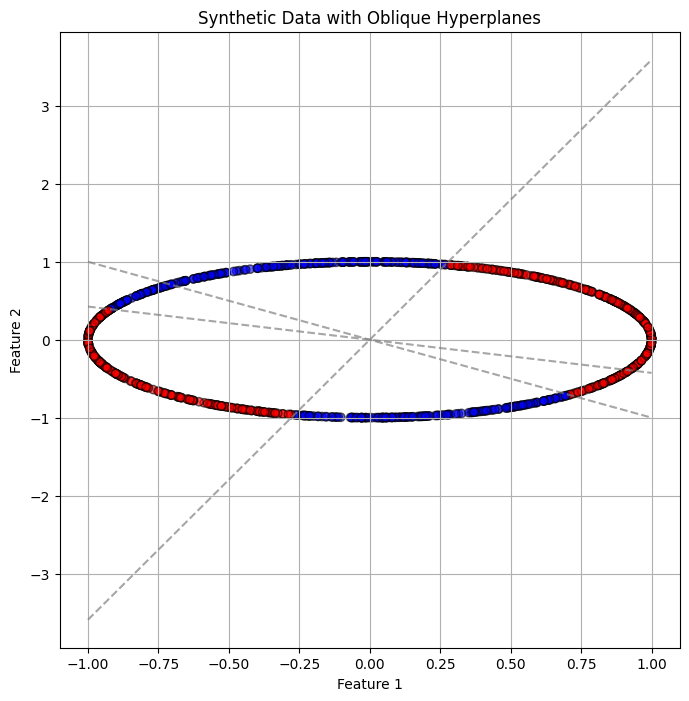

In [ ]:
import matplotlib.pyplot as plt

def plot_data_with_hyperplanes(X, y, hyperplanes):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6, edgecolors='k')

    x_vals = np.linspace(-1, 1, 200)
    for w, b in hyperplanes:
        if w[1] != 0:
            y_vals = -(w[0] * x_vals + b) / w[1]
            plt.plot(x_vals, y_vals, '--', color='gray', alpha=0.7)
        else:
            plt.axvline(x=-b/w[0], linestyle='--', color='gray', alpha=0.7)

    plt.title('Synthetic Data with Oblique Hyperplanes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

plot_data_with_hyperplanes(X, y, planes)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


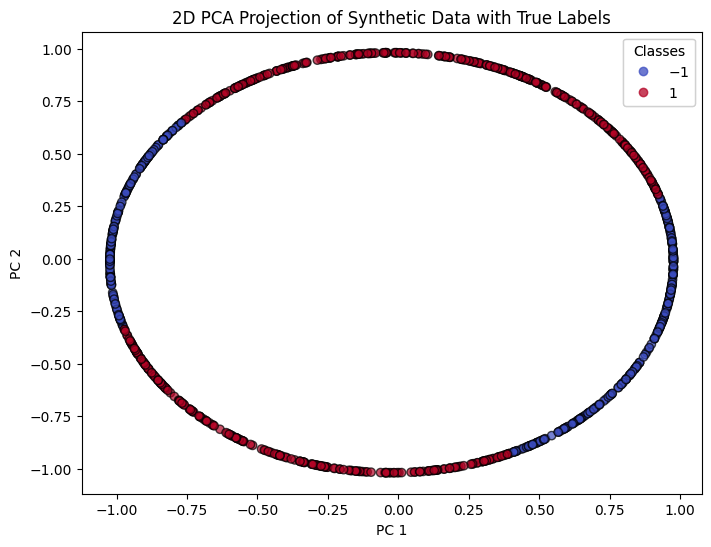

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title('2D PCA Projection of Synthetic Data with True Labels')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.show()


In [ ]:
import numpy as np

def generate_synthetic_data(num_samples, num_features, tree_depth, random_seed=42):
    np.random.seed(random_seed)

    # 1. Generate oblique hyperplanes for each internal node of a complete binary tree
    num_nodes = 2 ** tree_depth - 1
    hyperplanes = []
    for _ in range(num_nodes):
        w = np.random.randn(num_features)  # random direction
        w = w / np.linalg.norm(w)          # make it a unit vector (for fair splits)
        b = 0                              # bias (offset), usually 0 for symmetry
        hyperplanes.append((w, b))

    # 2. Sample points uniformly on the surface of the feature-space unit sphere
    X = np.random.randn(num_samples, num_features)
    X /= np.linalg.norm(X, axis=1, keepdims=True)

    # 3. Assign labels by routing each point down the tree according to splits
    def assign_label(x, node=0):
        if node >= num_nodes:
            # If we reach a leaf, label alternates (even: +1, odd: -1)
            leaf_index = node - num_nodes
            return 1 if leaf_index % 2 == 0 else -1
        w, b = hyperplanes[node]
        if np.dot(w, x) + b > 0:
            return assign_label(x, 2 * node + 2)  # go right
        else:
            return assign_label(x, 2 * node + 1)  # go left

    labels = [assign_label(x) for x in X]

    # 4. Remove points that fall exactly on any split hyperplane (for clean separation)
    tolerance = 1e-10
    keep = []
    for i, x in enumerate(X):
        if not any(abs(np.dot(w, x) + b) < tolerance for w, b in hyperplanes):
            keep.append(i)
    X = X[keep]
    labels = np.array(labels)[keep]

    return X, labels, hyperplanes

# Example usage for 1,000 samples, 5 features, tree of depth 3
X, y, planes = generate_synthetic_data(num_samples=1000, num_features=3, tree_depth=3)
print(X.shape, y.shape, len(planes))


(1000, 3) (1000,) 7


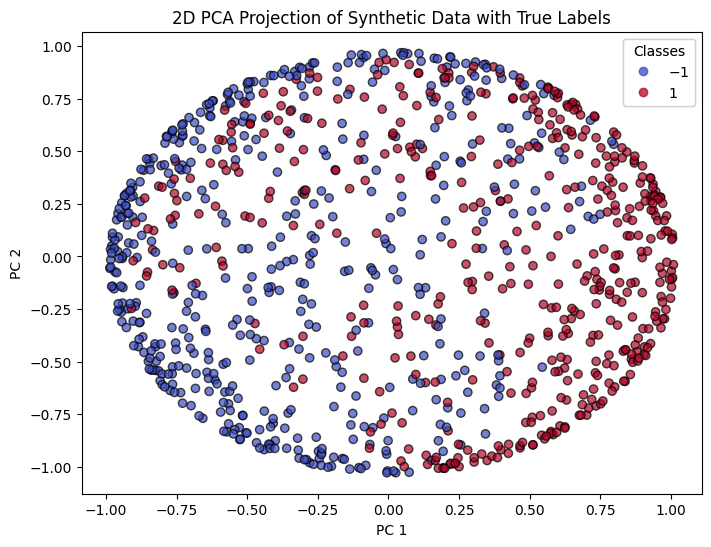

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title('2D PCA Projection of Synthetic Data with True Labels')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
plt.show()


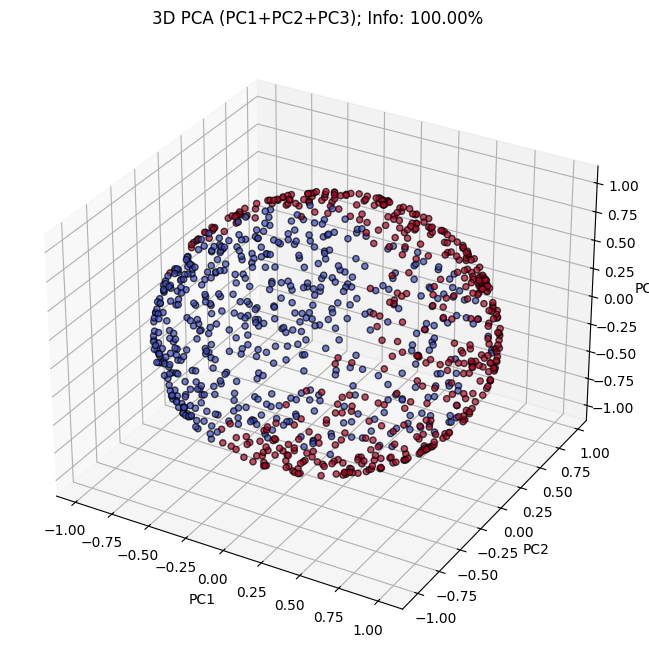

Percentage of variance in first 2 PCs: 68.25%
Percentage of variance in first 3 PCs: 100.00%


In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
info_2d = np.sum(explained_variance[:2]) * 100
info_3d = np.sum(explained_variance[:3]) * 100


# 3D Scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig_3d = plt.figure(figsize=(10,8))
ax3d = fig_3d.add_subplot(111, projection='3d')
ax3d.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k')
ax3d.set_title(f'3D PCA (PC1+PC2+PC3); Info: {info_3d:.2f}%')
ax3d.set_xlabel('PC1')
ax3d.set_ylabel('PC2')
ax3d.set_zlabel('PC3')
plt.show()

print(f"Percentage of variance in first 2 PCs: {info_2d:.2f}%")
print(f"Percentage of variance in first 3 PCs: {info_3d:.2f}%")

In [ ]:
import numpy as np
import plotly.graph_objs as go
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Map labels to colors
colors = ['red' if label == 1 else 'blue' for label in y]

# Create 3D scatter plot using Plotly
fig = go.Figure(data=[
    go.Scatter3d(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        z=X_pca[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=colors,
            opacity=0.8
        )
    )
])

fig.update_layout(
    title='Interactive 3D PCA Projection of Synthetic Data',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

# Output figure data for display
fig_json = fig.to_json()

### 3 labels


In [ ]:
import numpy as np

def generate_synthetic_data(num_samples, num_features, tree_depth, random_seed=42):
    np.random.seed(random_seed)

    # 1. Generate oblique hyperplanes for each internal node of a complete binary tree
    num_nodes = 2 ** tree_depth - 1
    hyperplanes = []
    for _ in range(num_nodes):
        w = np.random.randn(num_features)
        w = w / np.linalg.norm(w)
        b = 0
        hyperplanes.append((w, b))

    # 2. Sample points uniformly on the surface of the feature-space unit sphere
    X = np.random.randn(num_samples, num_features)
    X /= np.linalg.norm(X, axis=1, keepdims=True)

    # 3. Assign labels by routing each point down the tree
    num_leaves = 2 ** tree_depth
    def assign_label(x, node=0):
        if node >= num_nodes:
            leaf_index = node - num_nodes
            return leaf_index % 4  # 3 labels: 0, 1, 2
        w, b = hyperplanes[node]
        if np.dot(w, x) + b > 0:
            return assign_label(x, 2 * node + 2)  # right child
        else:
            return assign_label(x, 2 * node + 1)  # left child

    labels = [assign_label(x) for x in X]

    # 4. Remove points on any hyperplane for clean labels
    tolerance = 1e-10
    keep = []
    for i, x in enumerate(X):
        if not any(abs(np.dot(w, x) + b) < tolerance for w, b in hyperplanes):
            keep.append(i)
    X = X[keep]
    labels = np.array(labels)[keep]

    return X, labels, hyperplanes

# Test with tree depth 2, which gives 4 leaves and thus 4 % 3 → labels 0,1,2,0
X, y, planes = generate_synthetic_data(num_samples=1000, num_features=2, tree_depth=2)
print(X.shape, y.shape, len(planes))
print("Unique labels:", np.unique(y))


(1000, 2) (1000,) 3
Unique labels: [0 1 2 3]


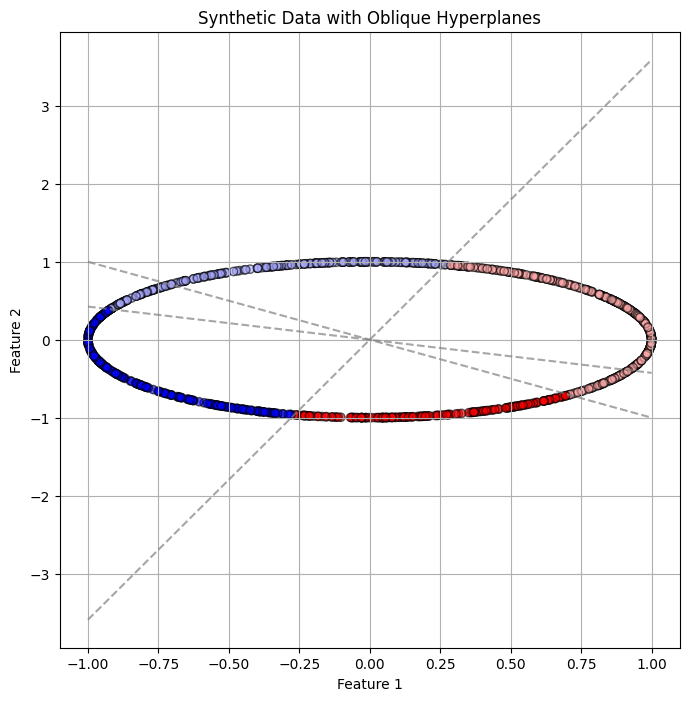

In [ ]:
import matplotlib.pyplot as plt

def plot_data_with_hyperplanes(X, y, hyperplanes):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.6, edgecolors='k')

    x_vals = np.linspace(-1, 1, 200)
    for w, b in hyperplanes:
        if w[1] != 0:
            y_vals = -(w[0] * x_vals + b) / w[1]
            plt.plot(x_vals, y_vals, '--', color='gray', alpha=0.7)
        else:
            plt.axvline(x=-b/w[0], linestyle='--', color='gray', alpha=0.7)

    plt.title('Synthetic Data with Oblique Hyperplanes')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

plot_data_with_hyperplanes(X, y, planes)


In [ ]:
def print_tree(hyperplanes, tree_depth):
    num_nodes = len(hyperplanes)
    num_leaves = 2 ** tree_depth

    def recurse(node=0, depth=0):
        indent = "  " * depth
        if node >= num_nodes:
            # It's a leaf node
            leaf_index = node - num_nodes
            label = leaf_index % 3  # same logic as label assignment
            print(f"{indent}Leaf {leaf_index} → Label {label}")
        else:
            w, b = hyperplanes[node]
            print(f"{indent}Node {node}: w={np.round(w, 2)}, b={b}")
            # Recurse on children
            recurse(2 * node + 1, depth + 1)  # left
            recurse(2 * node + 2, depth + 1)  # right

    print("Tree Structure:")
    recurse()


In [ ]:
print_tree(planes, tree_depth=2)

Tree Structure:
Node 0: w=[ 0.96 -0.27], b=0
  Node 1: w=[0.39 0.92], b=0
    Leaf 0 → Label 0
    Leaf 1 → Label 1
  Node 2: w=[-0.71 -0.71], b=0
    Leaf 2 → Label 2
    Leaf 3 → Label 0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_tree(hyperplanes, tree_depth):
    G = nx.DiGraph()
    pos = {}  # For node positions
    labels = {}  # For node labels
    num_nodes = len(hyperplanes)
    num_leaves = 2 ** tree_depth

    def recurse(node=0, depth=0, x=0.0):
        if node >= num_nodes:
            # Leaf node
            leaf_index = node - num_nodes
            label_val = leaf_index % 3
            G.add_node(node)
            pos[node] = (x, -depth)
            labels[node] = f"Leaf {leaf_index}\nLabel {label_val}"
            return

        # Internal node
        w, b = hyperplanes[node]
        w_str = np.round(w, 2)
        G.add_node(node)
        pos[node] = (x, -depth)
        labels[node] = f"Node {node}\nw={w_str}"

        # Left child
        left = 2 * node + 1
        recurse(left, depth + 1, x - 1 / (2 ** (depth + 1)))
        G.add_edge(node, left)

        # Right child
        right = 2 * node + 2
        recurse(right, depth + 1, x + 1 / (2 ** (depth + 1)))
        G.add_edge(node, right)

    # Start from root
    recurse()

    # Draw the tree
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, arrows=False,
            node_size=1500, node_color='lightblue', font_size=8)
    plt.title("Oblique Decision Tree Visualization")
    plt.axis('off')
    plt.show()


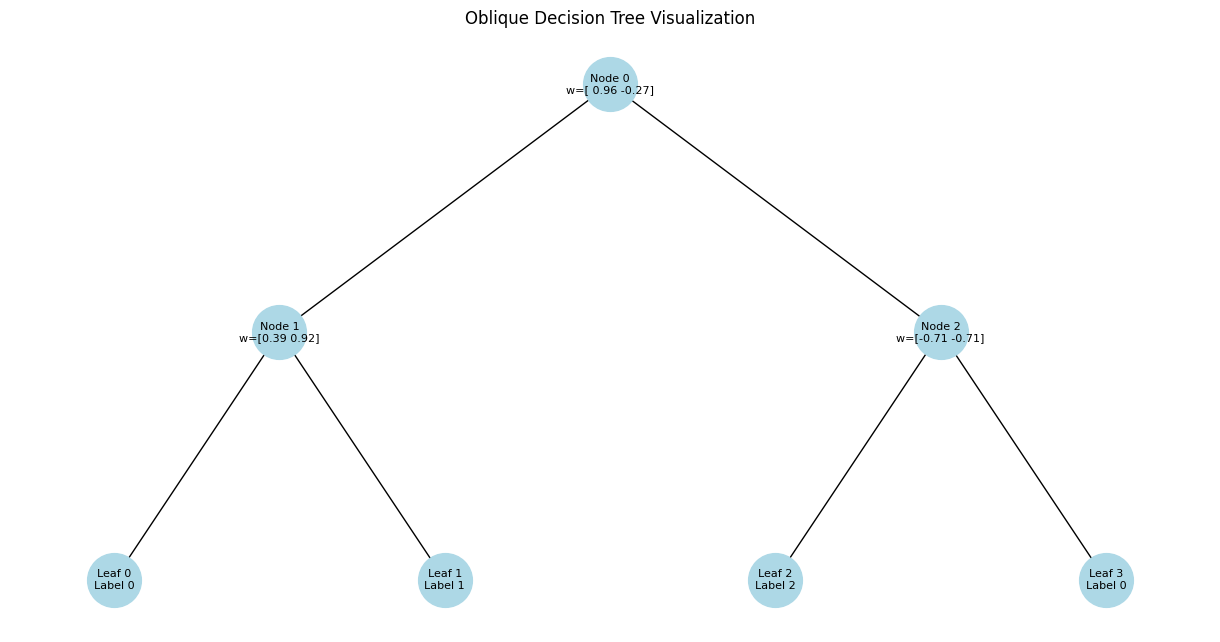

In [ ]:
visualize_tree(planes, tree_depth=2)